In [14]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('csv/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [15]:
print(X_train.shape)

(1119, 11)


In [16]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(120, activation='relu', input_shape=[11]),
    layers.Dense(1),
])

In [17]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [18]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 67ms/step - loss: 2.2600 - val_loss: 1.8722
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 1.5630 - val_loss: 1.2980
Epoch 3/10
5/5 [==============================] - 0s 17ms/step - loss: 1.0402 - val_loss: 0.8727
Epoch 4/10
5/5 [==============================] - 0s 16ms/step - loss: 0.7818 - val_loss: 0.8109
Epoch 5/10
5/5 [==============================] - 0s 16ms/step - loss: 0.8163 - val_loss: 0.8011
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 0.7853 - val_loss: 0.7663
Epoch 7/10
5/5 [==============================] - 0s 18ms/step - loss: 0.7187 - val_loss: 0.7079
Epoch 8/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6618 - val_loss: 0.6894
Epoch 9/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6418 - val_loss: 0.6828
Epoch 10/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6387 - val_loss: 0.6667


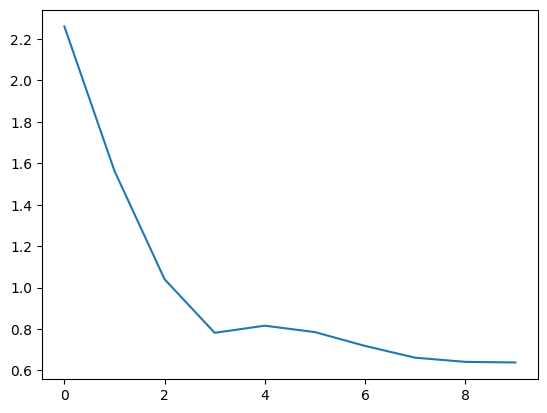

In [19]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [21]:
eval_result = model.evaluate(X_valid, y_valid)
print(f"Loss en datos de validación: {eval_result}")

15/15 [==============================] - 0s 835us/step - loss: 0.6667
Loss en datos de validación: 0.6666699051856995
